## Amerykański alfabet migowy
---
(*z pominięciem liter 'j' oraz 'z' z powodu ruchu wykonywanego przy pokazywaniu litery*)
![Litery w jezyku migowym](amer_sign2.png "Litery w jezyku migowym")
źródło: https://www.kaggle.com/datasets/datamunge/sign-language-mnist?resource=download


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam

In [3]:
#Wczytanie danych treningowych i testowych
train = pd.read_csv('./data/sign_mnist_train/sign_mnist_train.csv')
test = pd.read_csv('./data/sign_mnist_test/sign_mnist_test.csv')

In [4]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [5]:
test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,6,149,149,150,150,150,151,151,150,151,...,138,148,127,89,82,96,106,112,120,107
1,5,126,128,131,132,133,134,135,135,136,...,47,104,194,183,186,184,184,184,182,180
2,10,85,88,92,96,105,123,135,143,147,...,68,166,242,227,230,227,226,225,224,222
3,0,203,205,207,206,207,209,210,209,210,...,154,248,247,248,253,236,230,240,253,255
4,3,188,191,193,195,199,201,202,203,203,...,26,40,64,48,29,46,49,46,46,53


In [6]:
#Przeniesienie etykiet do osobnych tablic
x_train = train.iloc[:,1:]
y_train = train.iloc[:,0]
x_test = test.iloc[:,1:]
y_test = test.iloc[:,0]

#Wartości etykiet w zbiorze
unique_val = np.unique(np.array(y_train))
unique_val

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:xlabel='label', ylabel='count'>

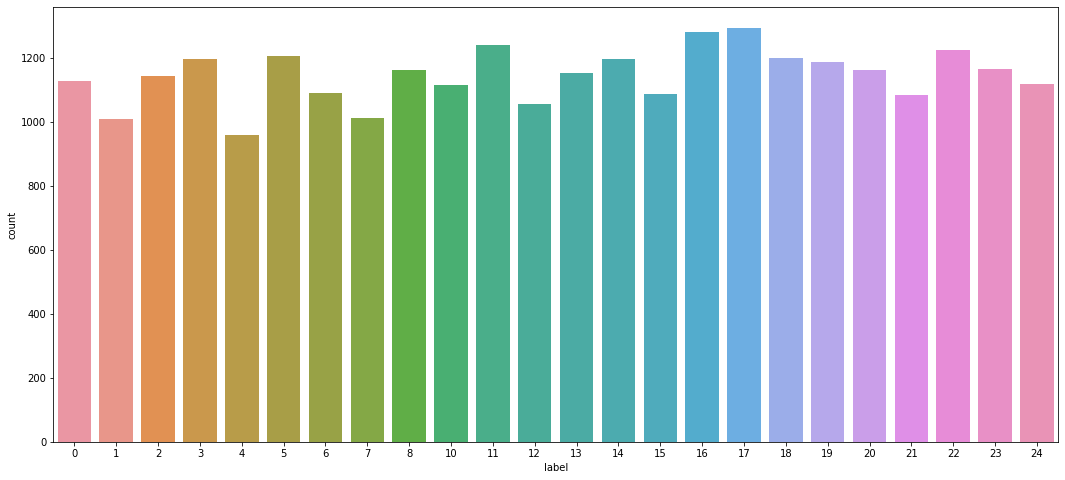

In [7]:
#Wykres przedstawiający liczności poszczególnych klas w zbiorze uczącym
plt.figure(figsize = (18,8))
sns.countplot(x = y_train)

In [8]:
#Tłumaczenie etykiet na litery alfabetu migowego
letters = ['a','b','c','d','e','f','g','h','i','k','l','m','n','o','p','q','r','s','t','u','v','w','x','y']
letter_label_dictionary = dict(zip(unique_val, letters))
print("etykieta - litera")
for i in letter_label_dictionary:
    print(i, '-', letter_label_dictionary[i])

etykieta - litera
0 - a
1 - b
2 - c
3 - d
4 - e
5 - f
6 - g
7 - h
8 - i
10 - k
11 - l
12 - m
13 - n
14 - o
15 - p
16 - q
17 - r
18 - s
19 - t
20 - u
21 - v
22 - w
23 - x
24 - y


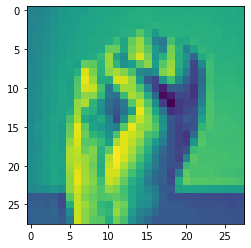

In [9]:
#Wyświetlenie przykładowego zdjęcia
imgs = x_train.values
imgs = np.array([np.reshape(i, (28, 28)) for i in imgs])
imgs = np.array([i.flatten() for i in imgs])

plt.imshow(imgs[10].reshape(28,28))


In [10]:
#Przygotowanie danych w odpowiednim, dla modelu, formacie 
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
x_train = x_train.values.reshape(-1,28,28,1)
x_test = x_test.values.reshape(-1,28,28,1)

In [11]:
#Stowrznie modelu CNN
model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Flatten())
model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.20))

model.add(Dense(25, activation = 'softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [12]:
#Przetestowanie modelu
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
215/215 [==============================] - 34s 155ms/step - loss: 2.1357 - accuracy: 0.3928 - val_loss: 0.9195 - val_accuracy: 0.6958
Epoch 2/10
215/215 [==============================] - 32s 147ms/step - loss: 0.4356 - accuracy: 0.8573 - val_loss: 0.5727 - val_accuracy: 0.8097
Epoch 3/10
215/215 [==============================] - 32s 150ms/step - loss: 0.1386 - accuracy: 0.9577 - val_loss: 0.5963 - val_accuracy: 0.8459
Epoch 4/10
215/215 [==============================] - 34s 158ms/step - loss: 0.0549 - accuracy: 0.9846 - val_loss: 0.5310 - val_accuracy: 0.8600
Epoch 5/10
215/215 [==============================] - 41s 189ms/step - loss: 0.0396 - accuracy: 0.9875 - val_loss: 0.5526 - val_accuracy: 0.8607
Epoch 6/10
215/215 [==============================] - 39s 181ms/step - loss: 0.0223 - accuracy: 0.9941 - val_loss: 0.5035 - val_accuracy: 0.8791
Epoch 7/10
215/215 [==============================] - 31s 143ms/step - loss: 0.0176 - accuracy: 0.9949 - val_loss: 0.6747 - val_ac

In [13]:
model.save('model1')

INFO:tensorflow:Assets written to: model1\assets


INFO:tensorflow:Assets written to: model1\assets


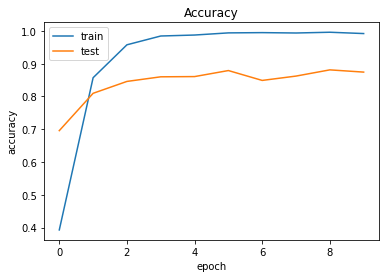

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.show()

In [15]:
#Stowrznie modelu CNN
model2 = Sequential()

model2.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu', input_shape=(28,28,1)))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu'))
model2.add(MaxPooling2D(pool_size = (2, 2)))

model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dropout(0.20))

model2.add(Dense(25, activation = 'softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [16]:
#Przetestowanie modelu2
history2 = model2.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
215/215 [==============================] - 33s 150ms/step - loss: 1.5749 - accuracy: 0.6866 - val_loss: 0.4728 - val_accuracy: 0.8529
Epoch 2/10
215/215 [==============================] - 41s 189ms/step - loss: 0.0714 - accuracy: 0.9800 - val_loss: 0.4583 - val_accuracy: 0.8936
Epoch 3/10
215/215 [==============================] - 34s 159ms/step - loss: 0.0317 - accuracy: 0.9913 - val_loss: 0.4849 - val_accuracy: 0.8812
Epoch 4/10
215/215 [==============================] - 34s 160ms/step - loss: 0.0242 - accuracy: 0.9928 - val_loss: 0.4645 - val_accuracy: 0.8986
Epoch 5/10
215/215 [==============================] - 34s 159ms/step - loss: 0.0150 - accuracy: 0.9955 - val_loss: 0.4622 - val_accuracy: 0.8997
Epoch 6/10
215/215 [==============================] - 38s 176ms/step - loss: 0.0185 - accuracy: 0.9942 - val_loss: 0.5112 - val_accuracy: 0.8878
Epoch 7/10
215/215 [==============================] - 34s 158ms/step - loss: 0.0154 - accuracy: 0.9949 - val_loss: 0.4809 - val_ac

In [17]:
model.save('model2')

INFO:tensorflow:Assets written to: model2\assets


INFO:tensorflow:Assets written to: model2\assets


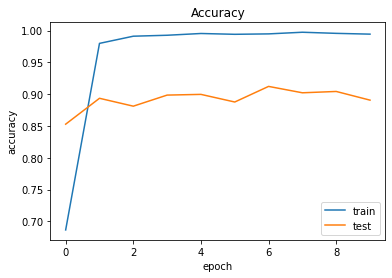

In [20]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.show()

In [21]:
#Stowrznie modelu CNN
model3 = Sequential()

model3.add(Conv2D(64, kernel_size=(3, 3), activation = 'relu', input_shape=(28,28,1)))
model3.add(MaxPooling2D(pool_size = (2, 2)))

model3.add(Flatten())
model3.add(Dense(128, activation = 'relu'))
model3.add(Dropout(0.20))

model3.add(Dense(25, activation = 'softmax'))

model3.compile(loss = 'categorical_crossentropy', optimizer=Adam(), metrics=['accuracy'])

In [22]:
#Przetestowanie modelu3
history3 = model3.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=128)

Epoch 1/10
215/215 [==============================] - 25s 114ms/step - loss: 8.3672 - accuracy: 0.0416 - val_loss: 3.2161 - val_accuracy: 0.0343
Epoch 2/10
215/215 [==============================] - 24s 113ms/step - loss: 3.2059 - accuracy: 0.0447 - val_loss: 3.2155 - val_accuracy: 0.0287
Epoch 3/10
215/215 [==============================] - 24s 114ms/step - loss: 3.3901 - accuracy: 0.0459 - val_loss: 3.1842 - val_accuracy: 0.0429
Epoch 4/10
215/215 [==============================] - 22s 102ms/step - loss: 2.9674 - accuracy: 0.0978 - val_loss: 2.9262 - val_accuracy: 0.1110
Epoch 5/10
215/215 [==============================] - 23s 108ms/step - loss: 2.7167 - accuracy: 0.1344 - val_loss: 2.8936 - val_accuracy: 0.1192
Epoch 6/10
215/215 [==============================] - 21s 97ms/step - loss: 2.6407 - accuracy: 0.1419 - val_loss: 2.8227 - val_accuracy: 0.1329
Epoch 7/10
215/215 [==============================] - 19s 86ms/step - loss: 2.4544 - accuracy: 0.1936 - val_loss: 2.6074 - val_accu

In [23]:
model.save('model3')

INFO:tensorflow:Assets written to: model3\assets


INFO:tensorflow:Assets written to: model3\assets


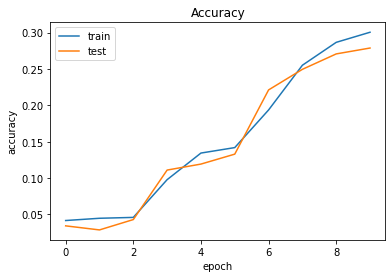

In [24]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train', 'test'])

plt.show()

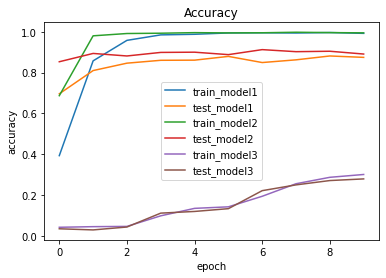

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train_model1', 'test_model1', 'train_model2', 'test_model2', 'train_model3', 'test_model3'])

plt.show()